In [19]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import pandas_datareader as web
from pandas.plotting import lag_plot
from datetime import datetime
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from datetime import datetime
import yfinance as yf
import pandas_datareader.data as pdr
import statsmodels.api as smapi
print(yf.pdr_override())

None


In [20]:
start = datetime.strptime('2014-01-01', '%Y-%m-%d')
end = datetime.strptime('2022-06-01', '%Y-%m-%d')

df = pdr.get_data_yahoo("AAPL", start, end).reset_index()
df['DATE'] = df['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))

[*********************100%***********************]  1 of 1 completed


In [22]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'DATE'], dtype='object')

In [12]:
# plt.figure(figsize=(10,10))
# lag_plot(df['Open'], lag=5)
# plt.title('Apple stock Autocorrelation plot')

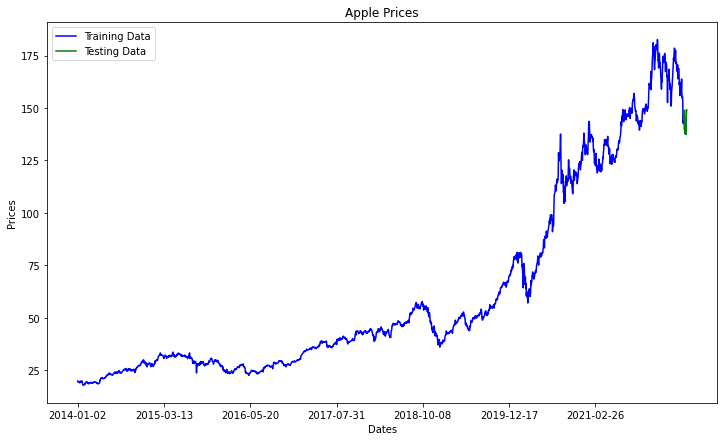

In [13]:
train_data, test_data = df[:-12], df[-12:]
plt.figure(figsize=(12,7))
plt.title('Apple Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,1857, 300), df['DATE'][0:1857:300])
plt.legend()

In [14]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [15]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values
history = [x for x in train_ar]
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

Testing Mean Squared Error: 13.945
Symmetric mean absolute percentage error: 2.019


In [16]:
print(test_ar,predictions)

[144.58999634 145.55000305 148.86000061 146.8500061  139.88000488
 139.08999634 137.78999329 140.80999756 138.42999268 137.38999939
 145.38999939 149.07000732] [143.94939495066453, 145.0252478001936, 145.43659775099894, 148.10014761449492, 147.28043817027336, 140.49209097974222, 139.68659251775392, 137.95207495135386, 140.39459769759605, 138.59319211195023, 137.4636818405498, 144.97810579820754]


/var/folders/9b/82v4qshj7wn5h7qbpp0s7tqw0000gn/T/ipykernel_73195/2126926255.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "green" (-> color=(0.0, 0.5019607843137255, 0.0, 1.0)). The keyword argument will take precedence.
  plt.plot(df['Open'], 'green', color='blue', label='Training Data')


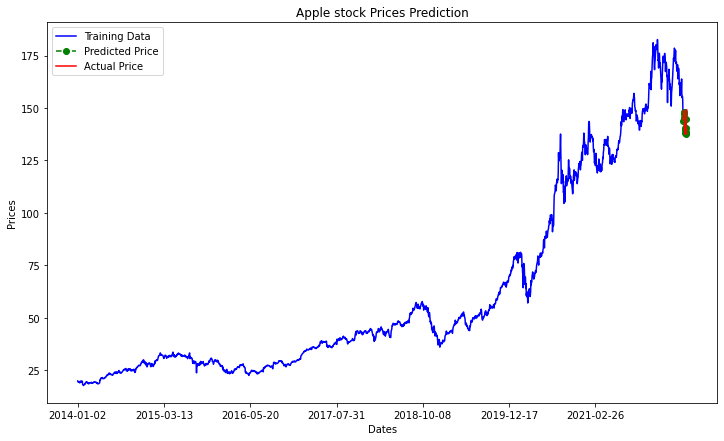

In [17]:
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Apple stock Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1857, 300), df['DATE'][0:1857:300])
plt.legend()

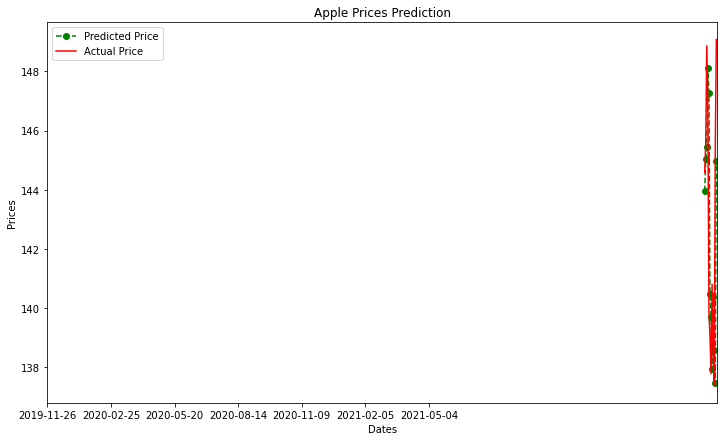

In [18]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.xticks(np.arange(1486,1856, 60), df['DATE'][1486:1856:60])
plt.title('Apple Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()